#### Import the necessary libraries

In [373]:
#%pip install pandas numpy matplotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import the dataset

In [374]:
df = pd.read_csv('nyc_housing_base.csv', sep = ',') 
df.head() 

,borough_x,block,lot,sale_price,zip_code,borough_y,yearbuilt,lotarea,bldgarea,resarea,comarea,unitsres,unitstotal,numfloors,latitude,longitude,landuse,bldgclass,building_age
0,1,400,11,280000,10009.0,MN,1900.0,2404.0,6875.0,6875.0,0.0,18.0,18.0,5.0,40.724415,-73.983891,2.0,C6,125.0
1,1,402,36,2000000,10009.0,MN,1900.0,1919.0,7810.0,6810.0,1000.0,8.0,10.0,5.0,40.724975,-73.981535,2.0,C4,125.0
2,1,402,60,3400000,10009.0,MN,1920.0,2150.0,6152.0,5352.0,800.0,8.0,9.0,5.0,40.725346,-73.983112,4.0,C7,105.0
3,1,404,42,4000000,10009.0,MN,1855.0,2369.0,6990.0,6990.0,0.0,10.0,10.0,5.0,40.727398,-73.980600,2.0,C4,170.0
4,1,372,55,655000,10009.0,MN,1920.0,5298.0,17990.0,17990.0,0.0,20.0,20.0,5.0,40.720621,-73.979534,2.0,C6,105.0


### Dataset Exploration - Raw Data

#### Understanding the dataset

In [375]:
# dataset size
rows, columns = df.shape
print("Number of rows:", rows)
print("Number of columns:", columns)

# data types
print("Dataset types:\n", df.dtypes)

Number of rows: 34439
Number of columns: 19
Dataset types:
 borough_x         int64
block             int64
lot               int64
sale_price        int64
zip_code        float64
borough_y        object
yearbuilt       float64
lotarea         float64
bldgarea        float64
resarea         float64
comarea         float64
unitsres        float64
unitstotal      float64
numfloors       float64
latitude        float64
longitude       float64
landuse         float64
bldgclass        object
building_age    float64
dtype: object


In [376]:
# summary statistics
df.describe()

,borough_x,block,lot,sale_price,zip_code,yearbuilt,lotarea,bldgarea,resarea,comarea,unitsres,unitstotal,numfloors,latitude,longitude,landuse,building_age
count,34439.000000,34439.000000,34439.000000,3.443900e+04,34423.000000,34439.000000,3.443900e+04,3.443900e+04,3.425100e+04,3.425100e+04,34439.000000,34439.000000,34396.000000,34433.000000,34433.000000,34436.000000,34439.000000
mean,3.073608,4562.694532,60.057174,1.171832e+06,10866.464370,1941.007579,5.244022e+04,6.271570e+04,5.593040e+04,6.846554e+03,51.716775,52.309765,4.227674,40.707342,-73.919829,1.943112,83.992421
std,1.287072,3611.017542,136.516558,1.241375e+06,557.770632,28.985203,5.032042e+05,2.712663e+05,2.116029e+05,6.971171e+04,173.385339,174.964326,5.230538,0.082194,0.108336,1.345451,28.985203
min,1.000000,1.000000,1.000000,1.186300e+04,10001.000000,1800.000000,1.610000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,40.500291,-74.253599,1.000000,0.000000
25%,2.000000,1432.000000,14.000000,5.125000e+05,10308.000000,1920.000000,2.090000e+03,1.614500e+03,1.356000e+03,0.000000e+00,1.000000,1.000000,2.000000,40.640011,-73.978330,1.000000,65.000000
50%,3.000000,3854.000000,33.000000,8.250000e+05,11210.000000,1935.000000,3.090000e+03,2.494000e+03,2.120000e+03,0.000000e+00,2.000000,2.000000,2.000000,40.705836,-73.915430,1.000000,90.000000
75%,4.000000,6678.000000,59.000000,1.300000e+06,11364.000000,1960.000000,7.502000e+03,1.450000e+04,9.816000e+03,0.000000e+00,13.000000,15.000000,4.000000,40.759718,-73.846150,3.000000,105.000000
max,5.000000,16350.000000,3635.000000,9.995000e+06,11697.000000,2025.000000,2.225160e+07,3.750565e+06,2.690565e+06,1.100000e+06,1887.000000,1906.000000,54.000000,40.912745,-73.700488,11.000000,225.000000


              Column  Missing_Count  Missing_Percentage
resarea      resarea            188                0.55
comarea      comarea            188                0.55
numfloors  numfloors             43                0.12
zip_code    zip_code             16                0.05
latitude    latitude              6                0.02
longitude  longitude              6                0.02
landuse      landuse              3                0.01


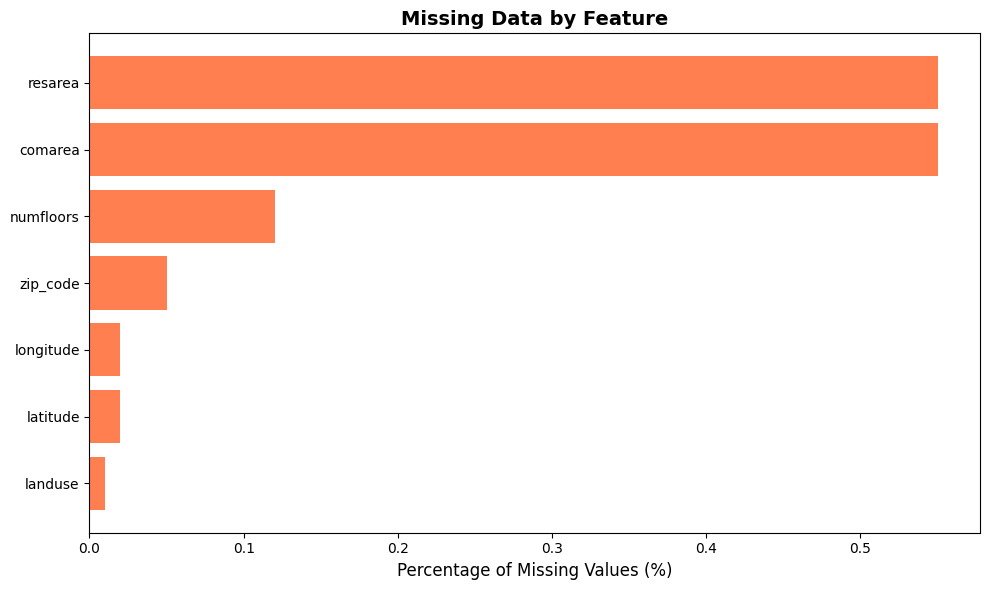

In [377]:
# missing values analysis
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})

# filter and sort missing data, only show columns with missing values
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_data)

# visualize the missing data in a bar plot
plt.figure(figsize=(10, 6))
missing_data_sorted = missing_data.sort_values('Missing_Percentage', ascending=True)
plt.barh(missing_data_sorted['Column'], missing_data_sorted['Missing_Percentage'], color='coral')
plt.xlabel('Percentage of Missing Values (%)', fontsize=12)
plt.title('Missing Data by Feature', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

#### Target Variable Analysis
This is done by examining the distribution and characteristics of the target variable: `sale_price`.

Sale price summary statistics:
count    3.443900e+04
mean     1.171832e+06
std      1.241375e+06
min      1.186300e+04
25%      5.125000e+05
50%      8.250000e+05
75%      1.300000e+06
max      9.995000e+06
Name: sale_price, dtype: float64


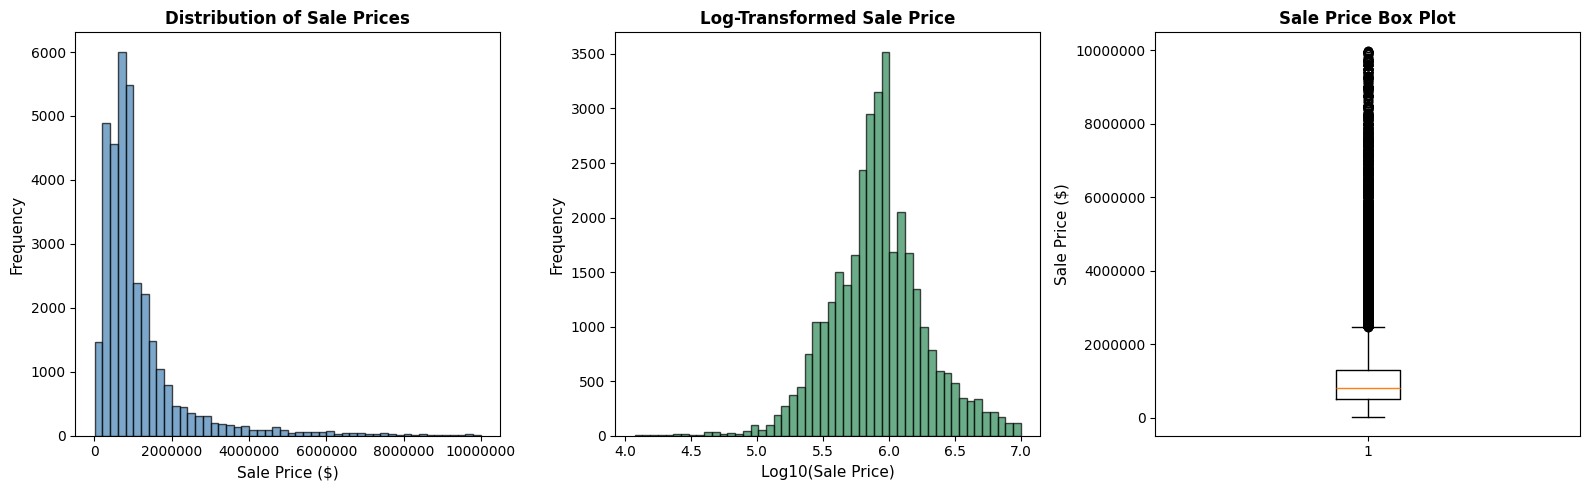

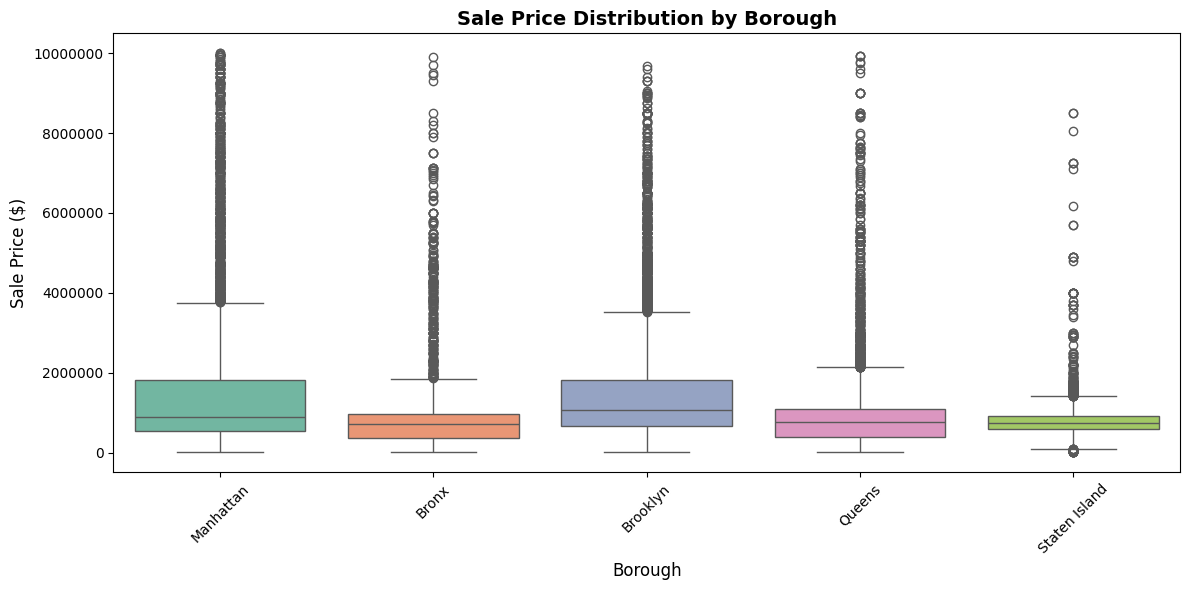


Sale price by borough:
               count          mean     median           std
borough_name                                               
Bronx           3389  9.560876e+05   710000.0  1.125213e+06
Brooklyn        8761  1.491933e+06  1065000.0  1.350283e+06
Manhattan       6721  1.565882e+06   895000.0  1.746846e+06
Queens         11770  8.851987e+05   760000.0  8.052374e+05
Staten Island   3798  8.169079e+05   735500.0  5.446832e+05


In [378]:
# Sale Price Analysis - the target variable 'sale_price'
print("Sale price summary statistics:")
# basic statistics of sale price
print(df['sale_price'].describe()) 

# setting up the matplotlib figure and axes for the plots
fig, axes = plt.subplots(1, 3, figsize=(16, 5))     # create 1 row, 3 columns of subplots

# PLOTS
# 1 - histogram of sale price distribution
axes[0].hist(df['sale_price'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)    # create histogram
axes[0].set_xlabel('Sale Price ($)', fontsize=11)   # x-axis label
axes[0].set_ylabel('Frequency', fontsize=11)        # y-axis label
axes[0].set_title('Distribution of Sale Prices', fontsize=12, fontweight='bold')    # title
axes[0].ticklabel_format(style='plain', axis='x')   # prevent scientific notation on x-axis

# 2 - log-transformed histogram of sale price distribution
axes[1].hist(np.log10(df['sale_price']), bins=50, color='seagreen', edgecolor='black', alpha=0.7)  # create histogram
axes[1].set_xlabel('Log10(Sale Price)', fontsize=11)    # x-axis label
axes[1].set_ylabel('Frequency', fontsize=11)    # y-axis label
axes[1].set_title('Log-Transformed Sale Price', fontsize=12, fontweight='bold')  # title

# 3 - box plot of sale price
axes[2].boxplot(df['sale_price'], vert=True)        # create box plot
axes[2].set_ylabel('Sale Price ($)', fontsize=11)   # y-axis label
axes[2].set_title('Sale Price Box Plot', fontsize=12, fontweight='bold')  # title
axes[2].ticklabel_format(style='plain', axis='y')   # prevent scientific notation on y-axis

# adjust layout and show plots
plt.tight_layout()
plt.show()

# 4 - box plot of sale price by borough
borough_names = {1: 'Manhattan', 2: 'Bronx', 3: 'Brooklyn', 4: 'Queens', 5: 'Staten Island'} # mapping borough codes to names
df['borough_name'] = df['borough_x'].map(borough_names) # create new column with borough names instead of codes

# created box plot 
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x='borough_name',
    y='sale_price',
    hue='borough_name',
    palette='Set2',
    legend=False
)
# customizing the plots
plt.xlabel('Borough', fontsize=12) # x-axis label
plt.ylabel('Sale Price ($)', fontsize=12) # y-axis label
plt.title('Sale Price Distribution by Borough', fontsize=14, fontweight='bold') # title
plt.xticks(rotation=45) # rotate x-axis labels for better readability
plt.ticklabel_format(style='plain', axis='y') # prevent scientific notation on y-axis
plt.tight_layout() # adjust layout
plt.show() # show plots

# summary by borough of sale price
print("\nSale price by borough:")
print(df.groupby('borough_name')['sale_price'].agg(['count', 'mean', 'median', 'std']))

#### Feature Distributions

Done by examining the distributions of key numerical features, to better understand their ranges and variability.


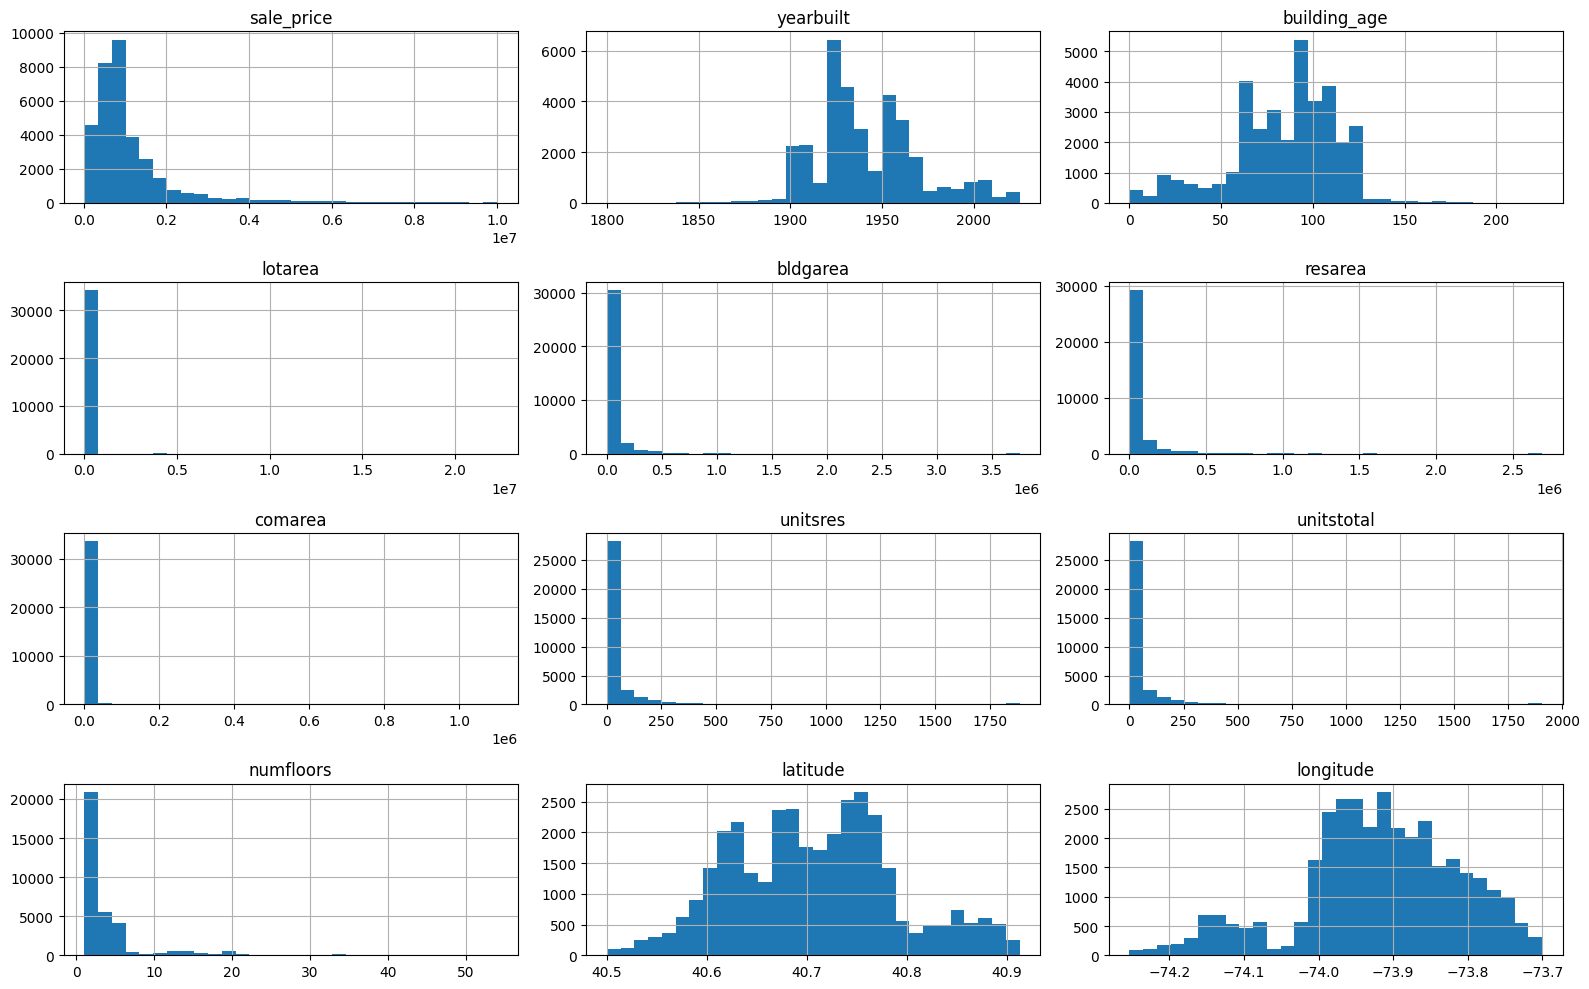

In [379]:
# correlation analysis of numeric features
# define numeric columns for correlation analysis - these are the relevant numeric features in the dataset
numeric_cols = [
    'sale_price',
    'yearbuilt',
    'building_age',
    'lotarea',
    'bldgarea',
    'resarea',
    'comarea',
    'unitsres',
    'unitstotal',
    'numfloors',
    'latitude',
    'longitude'
]

# display summary statistics of numeric columns
df[numeric_cols].describe()

# histograms of numeric columns for distribution analysis
df[numeric_cols].hist(bins=30, figsize=(16, 10))
plt.tight_layout()
plt.show()


#### Relationship with Target Variable
Analyze the correlations between the numerical features and the target variable.

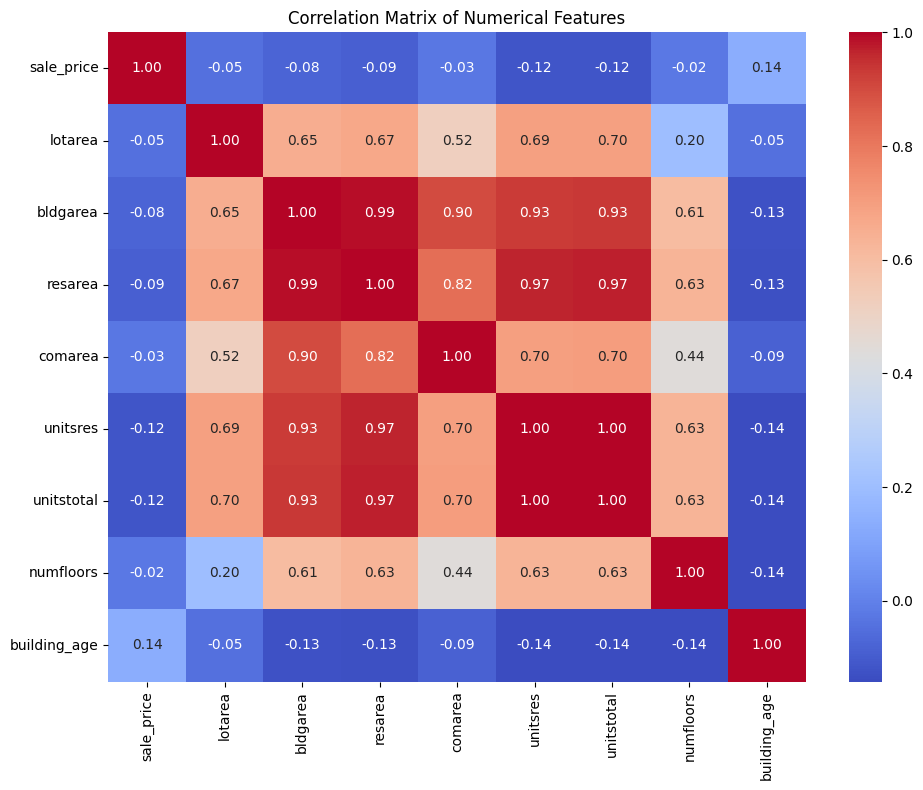

In [380]:
# correlation matrix heatmap
# define columns to include in the correlation matrix
corr_cols = [
    'sale_price',
    'lotarea',
    'bldgarea',
    'resarea',
    'comarea',
    'unitsres',
    'unitstotal',
    'numfloors',
    'building_age'
]

# plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    df[corr_cols].corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
# customizing the plot
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()


### Data Transformation

#### Clean missing values

##### zipcode column

In [381]:
# fill missing zip_code values with the most common (mode) zip_code in the same borough
print("Missing values in zip_code: ", df[df['zip_code'].isna()].shape[0])
df['zip_code'] = df.groupby('borough_x')['zip_code']\
                    .transform(lambda x: x.fillna(x.mode()[0]))

# check if there are still missing values
print("After imputation, missing values in zip_code: ", df["zip_code"].isna().sum())

Missing values in zip_code:  16
After imputation, missing values in zip_code:  0


##### resarea & comarea columns

In [382]:
# impute missing values for resarea and comarea with 0
# assuming that missing values indicate no residential or commercial area
print("Missing values in resarea: ", df[df['resarea'].isna()].shape[0])
print("Missing values in comarea: ", df[df['comarea'].isna()].shape[0])
df['resarea'] = df['resarea'].fillna(0)
df['comarea'] = df['comarea'].fillna(0)

# check if there are still missing values
print("After imputation, missing values in resarea and comarea:")
df[['resarea', 'comarea']].isna().sum()


Missing values in resarea:  188
Missing values in comarea:  188
After imputation, missing values in resarea and comarea:


resarea    0
comarea    0
dtype: int64

##### numfloors column

In [383]:
# impute missing values for numfloors with the median number of floors within the same building class
# if building class is also missing -> use overall median

# check how many missing values there are in numfloors
print("Missing values in numfloors: ", df[df['numfloors'].isna()].shape[0])

# compute group medians (NaN [no data] for all-NaN groups), then fill
group_medians = df.groupby('bldgclass')['numfloors'].transform('median')

# fill missing numfloors: first by building class median, then overall median
df['numfloors'] = df['numfloors'].fillna(group_medians)
df['numfloors'] = df['numfloors'].fillna(df['numfloors'].median())

# check if there are still missing values
print("After imputation, missing values in numfloors: ", df['numfloors'].isna().sum())


Missing values in numfloors:  43
After imputation, missing values in numfloors:  0


##### longitude & latitude columns

In [384]:
# impute missing values for longitude with the median longitude within the same borough
# if borough is also missing -> use overall median
print("Missing values in longitude: ", df[df["longitude"].isna()].shape[0])
df['longitude'] = df.groupby('borough_x')['longitude']\
                    .transform(lambda x: x.fillna(x.median()))

# impute missing values for latitude with the median latitude within the same borough
# if borough is also missing -> use overall median
print("Missing values in latitude: ", df[df["latitude"].isna()].shape[0])
df["latitude"] = df.groupby("borough_x")["latitude"]\
                   .transform(lambda x: x.fillna(x.median()))

# check if there are still missing values
print("\nAfter imputation, missing values in longitude and latitude:")
df[['longitude', 'latitude']].isna().sum()

Missing values in longitude:  6
Missing values in latitude:  6

After imputation, missing values in longitude and latitude:


longitude    0
latitude     0
dtype: int64

##### landuse column

In [385]:
# impute missing landuse values - based on resarea and comarea columns
print("Missing values in landuse: ", df[df["landuse"].isna()].shape[0])

# when resare > 0 and comarea = 0 -> impute as 'Residential'
df['landuse'] = np.where(
    df['landuse'].isna() & (df['resarea'] > 0) & (df['comarea'] == 0),
    'Residential',
    df['landuse']
)

# when resarea = 0 and comarea > 0 -> impute as 'Commercial'
df['landuse'] = np.where(
    df['landuse'].isna() & (df['resarea'] == 0) & (df['comarea'] > 0),
    'Commercial',
    df['landuse']
)

# when resarea > 0 and comarea > 0 -> impute as 'Mixed Use'
df['landuse'] = np.where(
    df['landuse'].isna() & (df['resarea'] > 0) & (df['comarea'] > 0),
    'Mixed Use',
    df['landuse']
)

# check remaining missing landuse values
print("After imputation, missing values in landuse: ", df["landuse"].isna().sum())


Missing values in landuse:  3
After imputation, missing values in landuse:  0


#### check missing values again

In [386]:
# check missing values
print(df.isnull().sum())

borough_x       0
block           0
lot             0
sale_price      0
zip_code        0
borough_y       0
yearbuilt       0
lotarea         0
bldgarea        0
resarea         0
comarea         0
unitsres        0
unitstotal      0
numfloors       0
latitude        0
longitude       0
landuse         0
bldgclass       0
building_age    0
borough_name    0
dtype: int64


#### Data duplication
The data in the set appeared to have 1003 duplicate rows, which after some careful analyzing was deduced that it needed to be removed from the dataset before the set can be used (to prevent overfitting).

In [387]:
#checking for duplicates
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# display duplicate rows
df[df.duplicated(keep=False)].head()

# analyze duplicate rows, group by relevant columns
df[df.duplicated(keep=False)] \
  .groupby(['borough_x', 'block', 'lot', 'sale_price']) \
  .size() \
  .sort_values(ascending=False) \
  .head()

# remove duplicates
df = df.drop_duplicates()

# verify all duplicates have been removed
df.duplicated().sum()

# final dataset size
print("Number of rows after removing duplicates:", df.shape[0])

Number of duplicate rows: 1003
Number of rows after removing duplicates: 33436


#### Variable Transformations

##### Target Variable Transformation 
Apply a logarithmic transformation (base-10) to the `sale_price` column to reduce right skewness and stabilize variance.

In [388]:
# ensure sale_price is positive before log transform
df = df.loc[df['sale_price'] > 0].copy()

# log-transform target variable
df['log_sale_price'] = np.log10(df['sale_price'])

# summary statistics
df['log_sale_price'].describe()


count    33436.000000
mean         5.917390
std          0.353203
min          4.074195
25%          5.718882
50%          5.916454
75%          6.110590
max          6.999783
Name: log_sale_price, dtype: float64

##### Borough Naming 
Fix naming of boroughs to match borough_x.

In [389]:
borough_names = {
    1: 'Manhattan',
    2: 'Bronx',
    3: 'Brooklyn',
    4: 'Queens',
    5: 'Staten Island'
}

df['borough_name'] = df['borough_x'].map(borough_names)
